In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'Arial'

dfs = []
for i in range(5):
    df = pd.read_csv(f"{i}ues.csv")
    df["UE_Count"] = i
    dfs.append(df)

# Combine all data
df_all = pd.concat(dfs, ignore_index=True)

df_all["Avg_MEM(MB)"] = df_all["Avg_MEM(Mi)"] * 1.048576
df_all["Disk_Usage(MB)"] = df_all["Disk_Usage(Mi)"] * 1.048576

df_all

,UE_Count,Duration,Container,Avg_CPU(millicores),Avg_MEM(Mi),Disk_Usage(Mi),Avg_MEM(MB),Disk_Usage(MB)
0,0,30,oai-gnb,1955,907,982,951.058432,1029.701632
1,0,30,metrics-parser,3,13,982,13.631488,1029.701632
2,0,30,oai-flexric,1,1,982,1.048576,1029.701632
3,0,60,oai-gnb,1957,907,1017,951.058432,1066.401792
4,0,60,metrics-parser,3,13,1017,13.631488,1066.401792
5,0,60,oai-flexric,1,1,1017,1.048576,1066.401792
6,0,120,oai-gnb,1957,908,1073,952.107008,1125.122048
7,0,120,metrics-parser,3,13,1073,13.631488,1125.122048
8,0,120,oai-flexric,1,1,1073,1.048576,1125.122048
9,1,30,oai-gnb,2039,910,1116,954.204160,1170.210816


In [2]:
# Table 1: Average CPU and MEM per container per UE_Count (averaged over all Duration)
table1 = (
    df_all.groupby(['UE_Count', 'Container'])[['Avg_CPU(millicores)', 'Avg_MEM(MB)']]
    .mean()
    .reset_index()
)

# Table 2: Unique Disk Usage per UE_Count and Duration (container set to 'prometheus')
table2 = (
    df_all[df_all['Container'] == 'metrics-parser']
    .drop_duplicates(subset=['UE_Count', 'Duration'])
    .loc[:, ['UE_Count', 'Duration', 'Disk_Usage(MB)']]
    .assign(Container='prometheus')
    .reset_index(drop=True)
)

display(table1)
display(table2)

,UE_Count,Container,Avg_CPU(millicores),Avg_MEM(MB)
0,0,metrics-parser,3.000000,13.631488
1,0,oai-flexric,1.000000,1.048576
2,0,oai-gnb,1956.333333,951.407957
3,1,metrics-parser,3.000000,13.631488
4,1,oai-flexric,1.000000,1.048576
5,1,oai-gnb,2060.666667,954.903211
6,2,metrics-parser,3.666667,13.631488
7,2,oai-flexric,1.000000,1.048576
8,2,oai-gnb,2167.333333,957.000363
9,3,metrics-parser,4.000000,13.631488


,UE_Count,Duration,Disk_Usage(MB),Container
0,0,30,1029.701632,prometheus
1,0,60,1066.401792,prometheus
2,0,120,1125.122048,prometheus
3,1,30,1170.210816,prometheus
4,1,60,1202.716672,prometheus
5,1,120,1266.679808,prometheus
6,2,30,1306.525696,prometheus
7,2,60,1343.225856,prometheus
8,2,120,1402.994688,prometheus
9,3,30,1447.034880,prometheus


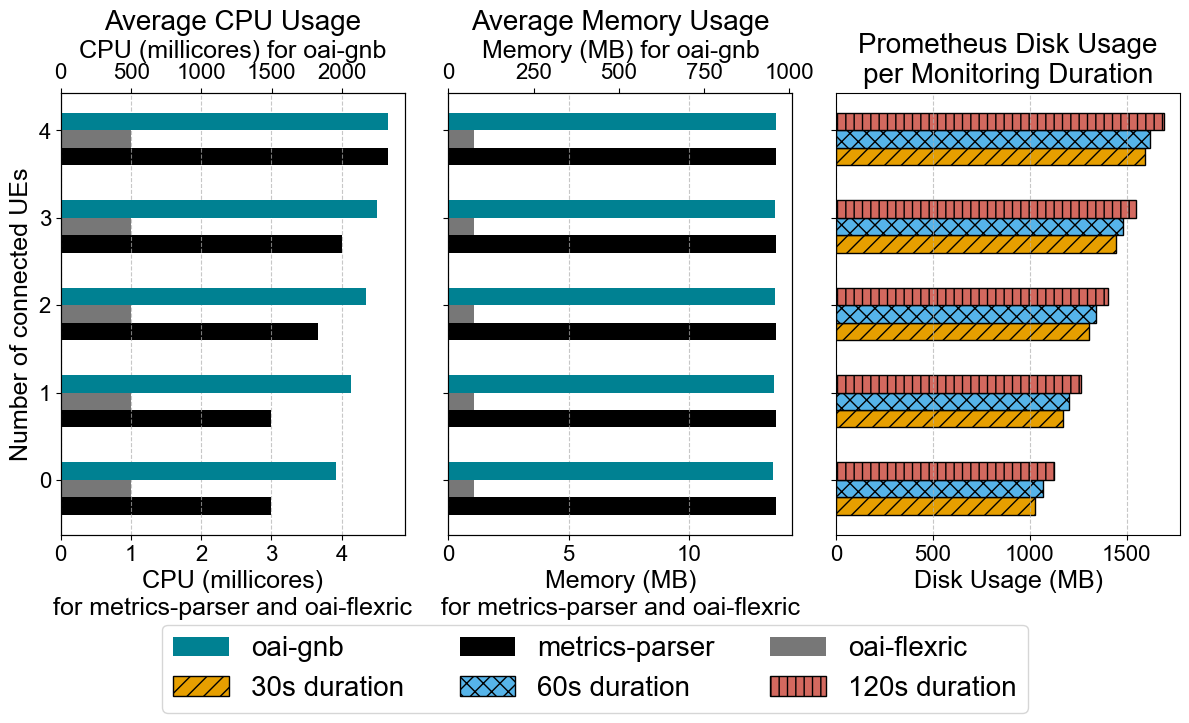

In [3]:
durations = sorted(set(df_all["Duration"]))
ue_count = sorted(set(df_all["UE_Count"]))

# Define containers and styling
containers = ["oai-gnb", "metrics-parser", "oai-flexric"]
colors = {
    "metrics-parser": "#000000",   # Black
    "oai-flexric": "#777777",      # Gray
    "oai-gnb": "#008192",          # Teal

    # Prometheus durations - Okabe-Ito palette
    "30s duration": "#E69F00",  # Orange
    "60s duration": "#56B4E9",  # Sky blue
    "120s duration": "#D3695F", # Bluish green
}

# Distinct hatch patterns for Prometheus durations
hatches = {
    "30s duration": "//",
    "60s duration": "xx",
    "120s duration": "||",
}

# Set up the figure with three subplots side by side
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 6), sharey=True, gridspec_kw={'width_ratios': [1, 1, 1]})

# Plot 1: CPU Usage
bar_height = 0.2
positions = np.arange(len(ue_count))  # Positions for each UE_Count
# Create horizontal bars for CPU usage
cpu_handles = []
cpu_labels = []
for i, container in enumerate(containers[1:]):  # Only metrics-parser, oai-flexric
    subset = table1[table1['Container'] == container]
    cpu_data = subset['Avg_CPU(millicores)']
    offset = (i - 1.5) * bar_height
    bars = ax1.barh([p + offset for p in positions], cpu_data, bar_height, label=container, color=colors[container])
    cpu_handles.append(bars)
    cpu_labels.append(container)

ax1.set_title("Average CPU Usage", fontsize=20, pad=7)
ax1.set_yticks(positions)
ax1.set_yticklabels(ue_count, fontsize=18)
ax1.set_ylabel("Number of connected UEs", fontsize=18)
ax1.set_xlabel("CPU (millicores)\nfor metrics-parser and oai-flexric", fontsize=18)
ax1.tick_params(axis='both', labelsize=16)
ax1.grid(True, axis='x', linestyle='--', alpha=0.7)

# Add second axis for CPU high range
ax1b = ax1.twiny()
ax1b.set_xlabel("CPU (millicores) for oai-gnb", fontsize=18)
ax1b.tick_params(axis='x', labelsize=16)
for i, container in enumerate(containers[:1]):   # Only oai-gnb container
    subset = table1[table1['Container'] == container]
    cpu_data = subset['Avg_CPU(millicores)']
    offset = (i + 2 - 1.5) * bar_height
    bars = ax1b.barh([p + offset for p in positions], cpu_data, bar_height, label=container, color=colors[container])
    cpu_handles.append(bars)
    cpu_labels.append(container)

# Plot 2: Memory Usage
mem_handles = []
mem_labels = []
for i, container in enumerate(containers[1:]):  # Only metrics-parser, oai-flexric
    subset = table1[table1['Container'] == container]
    mem_data = subset['Avg_MEM(MB)']
    offset = (i - 1.5) * bar_height
    bars = ax2.barh([p + offset for p in positions], mem_data, bar_height, label=container, color=colors[container])
    mem_handles.append(bars)
    mem_labels.append(container)

ax2.set_title("Average Memory Usage", fontsize=20, pad=7)
ax2.set_xlabel("Memory (MB)\nfor metrics-parser and oai-flexric", fontsize=18)
ax2.tick_params(axis='both', labelsize=16)
ax2.grid(True, axis='x', linestyle='--', alpha=0.7)

# Add second axis for memory high range
ax2b = ax2.twiny()
ax2b.set_xlabel("Memory (MB) for oai-gnb", fontsize=18)
ax2b.tick_params(axis='x', labelsize=16)
for i, container in enumerate(containers[:1]):  # Only oai-gnb container
    subset = table1[table1['Container'] == container]
    mem_data = subset['Avg_MEM(MB)']
    offset = (i + 2 - 1.5) * bar_height
    bars = ax2b.barh([p + offset for p in positions], mem_data, bar_height, label=container, color=colors[container])
    mem_handles.append(bars)
    mem_labels.append(container)

# Plot 3: Disk Usage (Prometheus, 3 values per UE_Count, one for each duration)
# Create 3 horizontal bars for prometheus disk usage per UE_Count, one for each monitoring duration
# Plot 3: Disk Usage (Prometheus)
disk_handles = []
disk_labels = []
for i, duration in enumerate(durations):
    container = f"{duration}s duration"
    subset = table2[table2['Duration'] == duration]
    disk_data = subset['Disk_Usage(MB)']
    offset = (i - 1.5) * bar_height
    bars = ax3.barh(
        [p + offset for p in positions],
        disk_data,
        bar_height,
        label=container,
        color=colors[container],
        hatch=hatches[container],
        edgecolor="black"  # Makes hatch visible
    )
    disk_handles.append(bars)
    disk_labels.append(container)

ax3.set_title("Prometheus Disk Usage\nper Monitoring Duration", fontsize=20, pad=7)
ax3.set_xlabel("Disk Usage (MB)", fontsize=18)
ax3.tick_params(axis='both', labelsize=16)
ax3.grid(True, axis='x', linestyle='--', alpha=0.7)

# Combine all handles and labels for a single legend
handles = cpu_handles + disk_handles
labels = cpu_labels + disk_labels

# Place a single legend at the bottom of the figure
#fig.legend(handles, labels, fontsize=9, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=3)

# Explicit handle and label ordering for legend
# First row: oai-gnb, metrics-parser, oai-flexric
# Second row: prometheus for 30s, 60s, 120s
ordered_labels = [
    "oai-gnb",
    "30s duration",
    "metrics-parser",
    "60s duration",
    "oai-flexric",
    "120s duration"
]

ordered_handles = [
    next(h for h, l in zip(cpu_handles + disk_handles, cpu_labels + disk_labels) if l == label)
    for label in ordered_labels
]

# Place the legend below the plots, in 3 columns = 2 rows of 3 items
fig.legend(
    ordered_handles,
    ordered_labels,
    fontsize=20,
    loc='lower center',
    bbox_to_anchor=(0.5, -0.22),
    ncol=3
)

# Adjust layout for better spacing, accounting for the legend
plt.tight_layout()
plt.subplots_adjust(bottom=0.10)  # Reduced space for the legend
plt.savefig("overhead_plots.pdf", format='pdf', dpi=900, bbox_inches='tight')
plt.show()